In [22]:
%matplotlib inline


import librosa
import librosa.display

import pandas
import numpy
import sklearn
import sklearn.model_selection

import IPython

import matplotlib.pyplot as plt

In [2]:
labels = pandas.read_csv('data/ff1010bird.labels.csv', index_col='itemid')
labels.head(3)

,datasetid,hasbird
itemid,,
64486,ff1010bird,0
2525,ff1010bird,0
44981,ff1010bird,0


In [3]:
len(labels), labels.hasbird.mean()

(7690, 0.2516254876462939)

In [4]:
pos = labels[labels.hasbird == 1].head(10)
neg = labels[labels.hasbird == 0].head(10)
v = neg.index.values
'{{{}}}'.format(','.join(str(i) for i in v))

'{64486,2525,44981,101323,165746,38232,104540,157473,132129,127302}'

In [30]:
def features(wavpath):
    y, sr = librosa.load(wavpath, offset=0)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=2048, hop_length=512, n_mfcc=20)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    return mel

def plot_mfcc(mfcc):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    
def plot_melspectrogram(S, title='Mel spectrogram', fmax=8000):
    plt.figure(figsize=(10, 4))
    d = librosa.power_to_db(S, ref=numpy.max)
    librosa.display.specshow(d, y_axis='mel', x_axis='time', fmax=fmax)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()


19037 64486


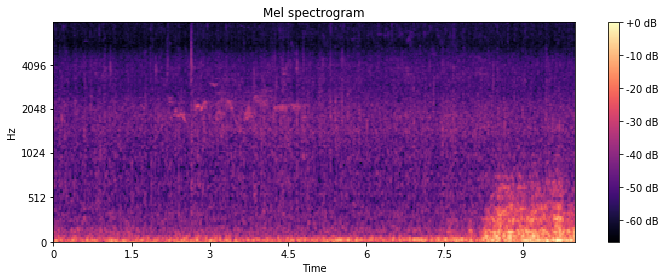

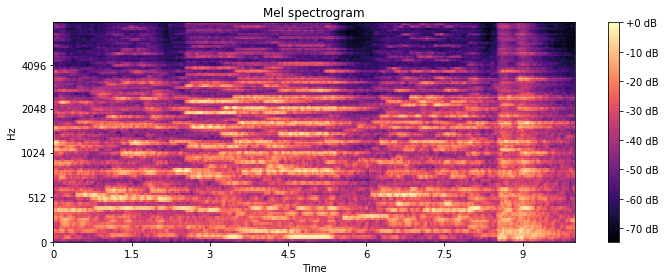

In [31]:
p = pos.index.values[0]
n = neg.index.values[0]
print(p, n)
p = features('data/ff1010bird/{}.wav'.format(p))
n = features('data/ff1010bird/{}.wav'.format(n))

#plot_mfcc(p)
#plot_mfcc(n)
plot_melspectrogram(p)
plot_melspectrogram(n)

IPython.display.Audio('data/ff1010bird/{}.wav'.format(pos.index.values[0]))

In [19]:
22050, p.shape[0]*p.shape[1]

(22050, 8620)